In [20]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# # Preprocessing and Feature Engineering
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


# # Model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.svm import SVC

# # Pipeline
# from sklearn.pipeline import Pipeline

# about the data

In [21]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Data Dictionary

**RowNumber:** The unique identifier for each record in the dataset<br>
**CustomerId:** Randomly generated values assigned to each customer<br>
**Surname:** The last name of the customer<br>
**CreditScore:** A measure of the customer's creditworthiness<br>
**Geography:** The customer's location<br>
**Gender:** The customer's gender<br>
**Age:** The customer's age<br>
**Tenure:** The number of years the customer has been a client of the bank, indicating loyalty.<br>
**Balance:** The amount of money in the customer's account<br>
**NumOfProducts:** The number of products the customer has purchased through the bank.<br>
**HasCrCard:** Indicates whether the customer has a credit card.<br>
**IsActiveMember:** Indicates whether the customer is an active member.<br>
**EstimatedSalary:** The estimated salary of the customer, which, similar to balance.<br>
**Exited:** Indicates whether the customer has left the bank or not, indicating whether a customer has churned (1) or not (0)<br>
**Complain:** Indicates whether the customer has made a complaint or not.<br>
**SatisfactionScore:** The score provided by the customer for the resolution of their complaint.<br>
**CardType:** The type of card held by the customer.<br>
**Points Earned:** The points earned by the customer for using their credit card.

We will remove a few features that will not impact our analysis and model.

In [23]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [26]:
print(df['Exited'].value_counts())
print(f"churn rate is: {df['Exited'].value_counts()[1]/len(df['Exited'])*100:.3f}%")

0    7962
1    2038
Name: Exited, dtype: int64
churn rate is: 20.380%


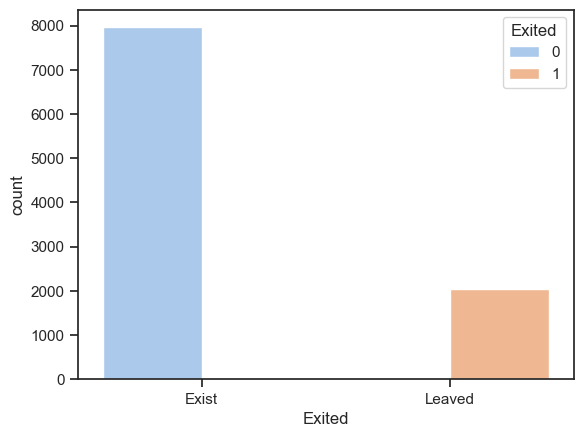

In [27]:
sns.set(style="ticks", palette="pastel")
plt.figure()
sns.countplot(x='Exited', data=df, hue="Exited")
plt.xticks([0, 1], ['Exist', 'Leaved'])
plt.show()

In [28]:
# Select the categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'CardType']

# Select the numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                      'SatisfactionScore', 'PointEarned']

# Count the number of categorical and numerical features
count_categorical = len(categorical_features)
count_numerical = len(numerical_features)

# Print the counts
print("Number of categorical features:", count_categorical)
print("Number of numerical features:", count_numerical)

Number of categorical features: 6
Number of numerical features: 8


# Data Preprocessing and Feature Engineering

**Checking if there are any duplicate rows.**

In [29]:
# Check for duplicate rows in the dataframe
num_duplicates = df.duplicated().sum()
print(f"The dataset has {num_duplicates} duplicate rows.")

The dataset has 0 duplicate rows.


trim the spaces in names

In [30]:
df = df.rename(columns={
    'Satisfaction Score': 'SatisfactionScore',
    'Card Type': 'CardType',
    'Point Earned': 'PointEarned'
})

**Outliers**

We have identified outliers in the 'CreditScore' and 'Age' columns. To address this, we will apply a log transformation. Additionally, we will use the winsorization technique to cap the outliers in the 'CreditScore' and 'Age' columns.

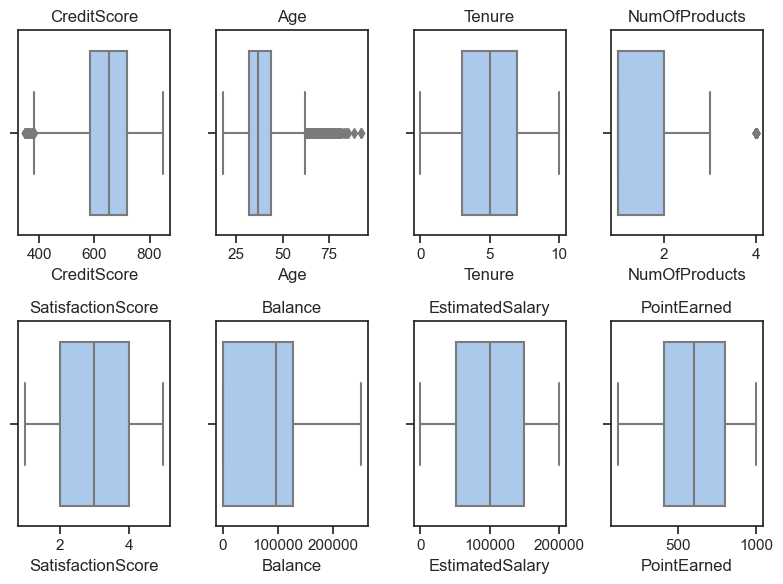

In [31]:
features = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'SatisfactionScore', 'Balance', 'EstimatedSalary', 'PointEarned']

# Create individual box plots for each feature
plt.figure(figsize=(8, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=feature,data=df)
    plt.title(feature)

plt.tight_layout()
plt.show()

The outliers make the distribution of 'CreditScore' and 'Age' skewed.

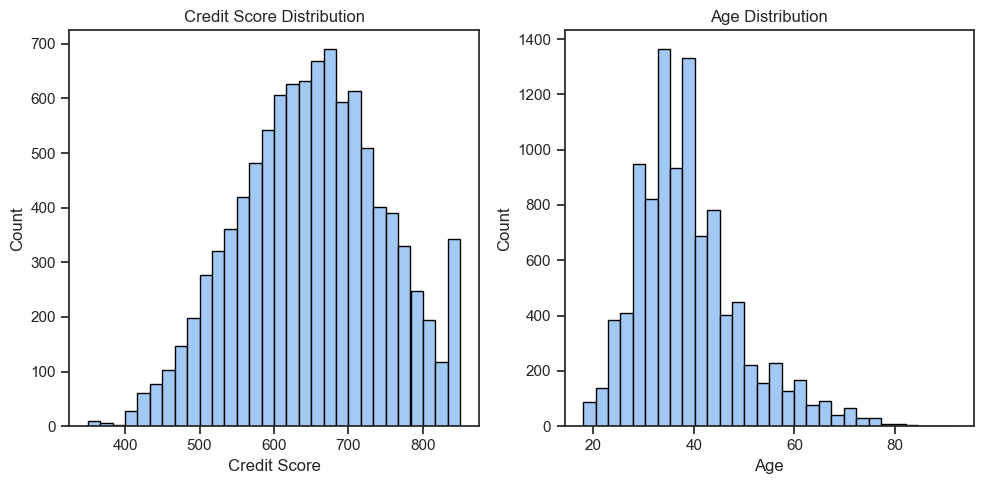

In [32]:
# Plotting the CreditScore distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['CreditScore'], bins=30, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution')

# Plotting the Age distribution
plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

In [33]:
# Function to identify outliers using IQR method
def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column < lower_bound) | (column > upper_bound)]

# Select outliers for each column
outliers_CreditScore = find_outliers(df['CreditScore'])
outliers_Age = find_outliers(df['Age'])

# Create a DataFrame to store outliers
outliers_df = pd.DataFrame({'outliers_CreditScore': outliers_CreditScore, 'outliers_Age': outliers_Age})

print(outliers_df.head())
print(outliers_df.tail())
print(outliers_df.count())

     outliers_CreditScore  outliers_Age
7                   376.0           NaN
58                    NaN          66.0
85                    NaN          75.0
104                   NaN          65.0
158                   NaN          73.0
      outliers_CreditScore  outliers_Age
9753                   NaN          68.0
9765                   NaN          64.0
9832                   NaN          64.0
9894                   NaN          77.0
9936                   NaN          77.0
outliers_CreditScore     15
outliers_Age            359
dtype: int64


as we can see the credit score outlier is not much and has no value so we can impute remove it

In [34]:
# Remove outliers from CreditScore
df.drop(outliers_CreditScore.index, inplace=True)
df.shape

(9985, 15)

for the age outlaiers we will apply a log transformation to mitigate the impact of outliers, which will make the bigger data less sensitive.

In [15]:
# Apply log transformation to outliers in Age
df['Age_log'] = np.log(df['Age'])


We also will apply **winsorization** to eliminate the outliers in age by replacing them with the values at a specific percentile.

In [16]:
q1 = df['Age_log'].quantile(0.25)
q3 = df['Age_log'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Age_log'] = df['Age_log'].clip(lower=lower_bound, upper=upper_bound)

### lets see the result

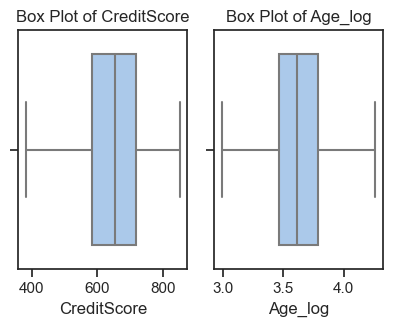

In [17]:
features = ['CreditScore', 'Age_log']

# Create individual box plots for each feature
plt.figure(figsize=(8, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

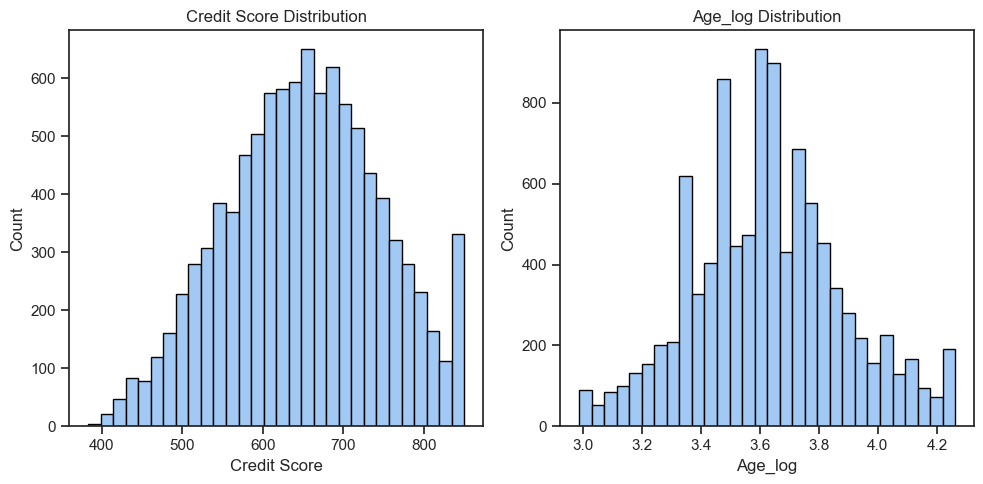

In [18]:
# Plotting the CreditScore distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['CreditScore'], bins=30, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution')

# Plotting the Age distribution
plt.subplot(1, 2, 2)
plt.hist(df['Age_log'], bins=30, edgecolor='black')
plt.xlabel('Age_log')
plt.ylabel('Count')
plt.title('Age_log Distribution')

plt.tight_layout()
plt.show()